In [77]:
import pandas as pd 
import numpy as np 
import datetime


#tendencias
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

#pip install pyramid-arima
from pmdarima.arima import auto_arima

#visualizaciones
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 



# 
# Limpieza de datos para Positivos Covid Perú

In [78]:
data = pd.read_csv('positivos_covid.csv')
data

,Unnamed: 0,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,0,20210417,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0
1,1,20210417,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0
2,2,20210417,f016889b9ba5bd95cf15d60205cbd82e,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0
3,3,20210417,971f8e1295583756d81fe42f3318488c,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0
4,4,20210417,bc45b71b005a96f32eeb97060616a999,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0
...,...,...,...,...,...,...,...,...,...,...
1704752,1704752,20210417,4d9756034c6668532f0d8f0de7bcb064,LIMA,LIMA,ATE,PCR,17.0,MASCULINO,20201204.0
1704753,1704753,20210417,6bc06fda2e058248f4f6caf700b5f597,LIMA,LIMA,ATE,PCR,16.0,MASCULINO,20201231.0
1704754,1704754,20210417,35b90cf37950c046bb1497bb48671e93,LIMA,LIMA,LURIGANCHO,PCR,16.0,MASCULINO,20201228.0
1704755,1704755,20210417,c3259f89e2ff1db88117a22fadc6d113,LIMA,LIMA,LA MOLINA,PCR,17.0,MASCULINO,20210102.0


In [79]:
# Creamos un nuevo dataframe para evaluar tendencias con los datos específicos que se necesita
positivosPeru = data[['FECHA_RESULTADO','DEPARTAMENTO','METODODX','EDAD','SEXO']]
positivosPeru

,FECHA_RESULTADO,DEPARTAMENTO,METODODX,EDAD,SEXO
0,20200329.0,LAMBAYEQUE,PR,35.0,FEMENINO
1,20200330.0,LIMA,PR,36.0,MASCULINO
2,20200330.0,LIMA,PR,1.0,FEMENINO
3,20200330.0,LIMA,PR,65.0,FEMENINO
4,20200330.0,LIMA,PR,32.0,FEMENINO
...,...,...,...,...,...
1704752,20201204.0,LIMA,PCR,17.0,MASCULINO
1704753,20201231.0,LIMA,PCR,16.0,MASCULINO
1704754,20201228.0,LIMA,PCR,16.0,MASCULINO
1704755,20210102.0,LIMA,PCR,17.0,MASCULINO


In [80]:
positivosPeru['FECHA_RESULTADO']=pd.to_datetime(positivosPeru['FECHA_RESULTADO'].astype(str),format='%Y%m%d') 

<ipython-input-80-c8cd3432a319>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# VERIFICANDO VALORES NULOS

print('Valores nulos FECHA_RESULTADO: ', positivosPeru['FECHA_RESULTADO'].isnull().sum(), 'valores nulos')
print('Valores nulos DEPARTAMENTO: ', positivosPeru['DEPARTAMENTO'].isnull().sum(), 'valores nulos')
print('Valores nulos METODODX: ', positivosPeru['METODODX'].isnull().sum(), 'valores nulos')
print('Valores nulos EDAD: ', positivosPeru['EDAD'].isnull().sum(), 'valores nulos')
print('Valores nulos SEXO: ', positivosPeru['SEXO'].isnull().sum(), 'valores nulos')
print('Cantidad de Datos: ', positivosPeru.shape[0])

Valores nulos FECHA_RESULTADO:  2023 valores nulos
Valores nulos DEPARTAMENTO:  0 valores nulos
Valores nulos METODODX:  0 valores nulos
Valores nulos EDAD:  336 valores nulos
Valores nulos SEXO:  1 valores nulos
Cantidad de Datos:  1704757


In [82]:
positivosPeru = positivosPeru.dropna()

In [83]:
print('Valores nulos FECHA_RESULTADO: ', positivosPeru['FECHA_RESULTADO'].isnull().sum(), 'valores nulos')
print('Valores nulos DEPARTAMENTO: ', positivosPeru['DEPARTAMENTO'].isnull().sum(), 'valores nulos')
print('Valores nulos METODODX: ', positivosPeru['METODODX'].isnull().sum(), 'valores nulos')
print('Valores nulos EDAD: ', positivosPeru['EDAD'].isnull().sum(), 'valores nulos')
print('Valores nulos SEXO: ', positivosPeru['SEXO'].isnull().sum(), 'valores nulos')
print('Cantidad de Datos: ', positivosPeru.shape[0])

Valores nulos FECHA_RESULTADO:  0 valores nulos
Valores nulos DEPARTAMENTO:  0 valores nulos
Valores nulos METODODX:  0 valores nulos
Valores nulos EDAD:  0 valores nulos
Valores nulos SEXO:  0 valores nulos
Cantidad de Datos:  1702397


In [84]:
# evaluamos los tipo de datos
positivosPeru.dtypes

FECHA_RESULTADO    datetime64[ns]
DEPARTAMENTO               object
METODODX                   object
EDAD                      float64
SEXO                       object
dtype: object

In [85]:
positivosPeru['EDAD'] = positivosPeru['EDAD'].astype(np.int64) #pasamos la edad a dato entero

<ipython-input-85-5b1df84cbccc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
# POSITIVOS COVID DATA A EVALUAR
positivosPeru.head(10)

,FECHA_RESULTADO,DEPARTAMENTO,METODODX,EDAD,SEXO
0,2020-03-29,LAMBAYEQUE,PR,35,FEMENINO
1,2020-03-30,LIMA,PR,36,MASCULINO
2,2020-03-30,LIMA,PR,1,FEMENINO
3,2020-03-30,LIMA,PR,65,FEMENINO
4,2020-03-30,LIMA,PR,32,FEMENINO
5,2020-03-30,LIMA,PR,44,MASCULINO
6,2020-03-30,LIMA,PR,29,FEMENINO
7,2020-03-30,LIMA,PR,44,FEMENINO
8,2020-03-30,LIMA REGION,PR,41,MASCULINO
9,2020-03-30,LIMA,PR,40,MASCULINO


# 
# Limpieza de datos para Fallecidos Covid Perú

In [87]:
data_fallecidos = pd.read_csv('fallecidos_covid.csv',sep=';')
data_fallecidos.head(10) 

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210417,c918aea2eba4d16f5346a662ed37e630,20200616,92,FEMENINO,19271025.0,CAJAMARCA,CHOTA,CHOTA
1,20210417,82e36091bcea66e17e97d441c9a6c50b,20200617,84,FEMENINO,19351013.0,CAJAMARCA,CONTUMAZA,CHILETE
2,20210417,224a4927a761daca282a8a8070366d6f,20200619,61,MASCULINO,19590329.0,CAJAMARCA,CAJAMARCA,CAJAMARCA
3,20210417,77fa7b2a1180084d98aa86996e692f2b,20200623,66,FEMENINO,19540505.0,CAJAMARCA,JAEN,JAEN
4,20210417,4dd0042cd2cad47febaf65c05ef7139c,20200623,83,FEMENINO,19361227.0,CAJAMARCA,CAJAMARCA,CAJAMARCA
5,20210417,1263b038b70348a821df515620a716f8,20200623,79,FEMENINO,19401009.0,CAJAMARCA,JAEN,JAEN
6,20210417,88c424d725f564f99b40fc7f2825dffa,20200624,79,MASCULINO,19400512.0,CAJAMARCA,CHOTA,CHOTA
7,20210417,d95bc37cf3d56f0934e633e7c84299c7,20200626,51,MASCULINO,19690423.0,CAJAMARCA,JAEN,JAEN
8,20210417,537d332e13b9289e4e7ba75c84b92924,20200626,63,MASCULINO,19560803.0,CAJAMARCA,JAEN,JAEN
9,20210417,afd673d05e19aa7688105a5b87b5b967,20200626,72,MASCULINO,19480513.0,CAJAMARCA,JAEN,JAEN


In [88]:
# Creamos un nuevo dataframe para evaluar tendencias con los datos específicos que se necesita
fallecidosPeru = data_fallecidos[['FECHA_FALLECIMIENTO','DEPARTAMENTO','SEXO','EDAD_DECLARADA']]
fallecidosPeru.head()

,FECHA_FALLECIMIENTO,DEPARTAMENTO,SEXO,EDAD_DECLARADA
0,20200616,CAJAMARCA,FEMENINO,92
1,20200617,CAJAMARCA,FEMENINO,84
2,20200619,CAJAMARCA,MASCULINO,61
3,20200623,CAJAMARCA,FEMENINO,66
4,20200623,CAJAMARCA,FEMENINO,83


In [89]:
#VERIFICAMOS LOS DATOS
fallecidosPeru.dtypes

FECHA_FALLECIMIENTO     int64
DEPARTAMENTO           object
SEXO                   object
EDAD_DECLARADA          int64
dtype: object

In [90]:
#cambiamos la columna FECHA_FALLECIMIENTO a tipo fecha
fallecidosPeru['FECHA_FALLECIMIENTO']=pd.to_datetime(fallecidosPeru['FECHA_FALLECIMIENTO'].astype(str),format='%Y%m%d') 

<ipython-input-90-930178122ce6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# VERIFICANDO VALORES NULOS

print('Valores nulos FECHA_FALLECIMIENTO: ', fallecidosPeru['FECHA_FALLECIMIENTO'].isnull().sum(), 'valores nulos')
print('Valores nulos DEPARTAMENTO: ', fallecidosPeru['DEPARTAMENTO'].isnull().sum(), 'valores nulos')
print('Valores nulos EDAD: ', fallecidosPeru['EDAD_DECLARADA'].isnull().sum(), 'valores nulos')
print('Valores nulos SEXO: ', fallecidosPeru['SEXO'].isnull().sum(), 'valores nulos')
print('Cantidad de Datos: ', fallecidosPeru.shape[0])

Valores nulos FECHA_FALLECIMIENTO:  0 valores nulos
Valores nulos DEPARTAMENTO:  0 valores nulos
Valores nulos EDAD:  0 valores nulos
Valores nulos SEXO:  0 valores nulos
Cantidad de Datos:  57230


In [92]:
# FALLECIDOS COVID DATA A EVALUAR
fallecidosPeru.head(10) 

,FECHA_FALLECIMIENTO,DEPARTAMENTO,SEXO,EDAD_DECLARADA
0,2020-06-16,CAJAMARCA,FEMENINO,92
1,2020-06-17,CAJAMARCA,FEMENINO,84
2,2020-06-19,CAJAMARCA,MASCULINO,61
3,2020-06-23,CAJAMARCA,FEMENINO,66
4,2020-06-23,CAJAMARCA,FEMENINO,83
5,2020-06-23,CAJAMARCA,FEMENINO,79
6,2020-06-24,CAJAMARCA,MASCULINO,79
7,2020-06-26,CAJAMARCA,MASCULINO,51
8,2020-06-26,CAJAMARCA,MASCULINO,63
9,2020-06-26,CAJAMARCA,MASCULINO,72


# 
# ANÁLISIS EXPLORATORIO DE DATOS

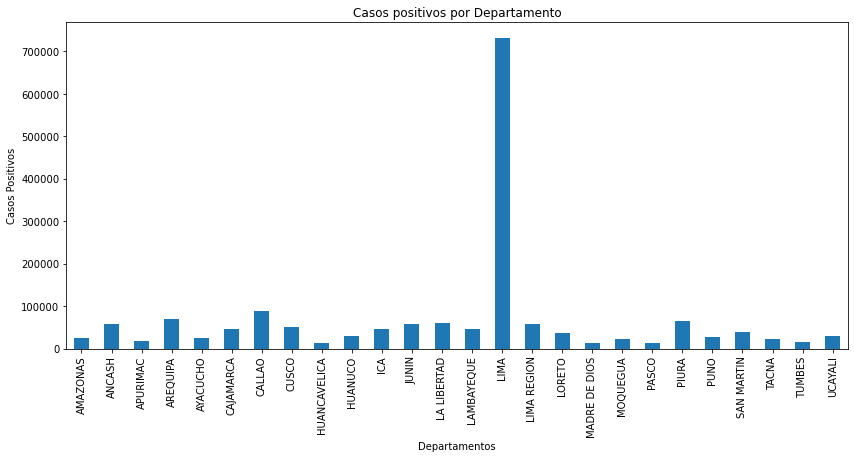

In [93]:
positivosPeru.groupby('DEPARTAMENTO').size().plot.bar(figsize=(14,6))
plt.title('Casos positivos por Departamento')
plt.xlabel('Departamentos')
plt.ylabel('Casos Positivos')
plt.show()

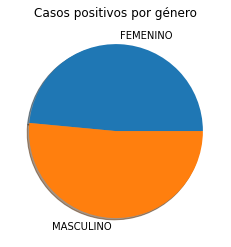

In [94]:
positivosPeru.groupby('SEXO').size().plot.pie(shadow = True)
plt.title('Casos positivos por género')
plt.ylabel("")
plt.show()

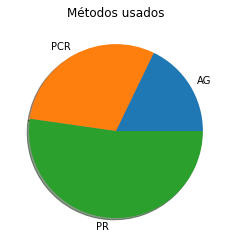

In [95]:
positivosPeru.groupby('METODODX').size().plot.pie(shadow = True)
plt.title('Métodos usados')
plt.ylabel("")
plt.show()

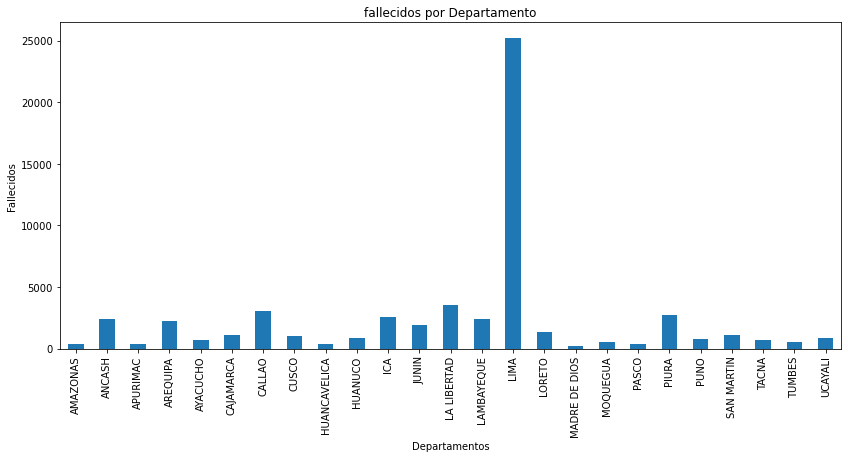

In [96]:
fallecidosPeru.groupby('DEPARTAMENTO').size().plot.bar(figsize=(14,6))
plt.title('fallecidos por Departamento')
plt.xlabel('Departamentos')
plt.ylabel('Fallecidos') 
plt.show()

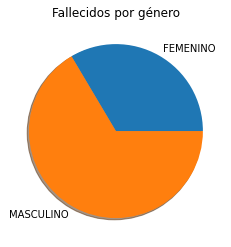

In [97]:
fallecidosPeru.groupby('SEXO').size().plot.pie(shadow = True)
plt.title('Fallecidos por género')
plt.ylabel("")
plt.show()

# 
# Predicciones  - Preparando Datos

### Positivos

In [98]:
positivos = pd.DataFrame(data= {'Casos':positivosPeru.groupby('FECHA_RESULTADO').size()})
positivos = positivos.reset_index() #Evitamos que la FECHA_RESULTADO sea tomado como índice en el DataFrame

In [99]:
#para los ejes X nos centraremos por días que transcurrieron desde que empezo la pandemia.
#consideramos el 6 de Marzo como día 1 hasta el 17 de abril del 2021 como día 406, siendo así evaluados 406 días de Pandemia
start = datetime.datetime(2020,3,8)
end = datetime.datetime(2021,4,17)

index = pd.date_range(start, end)
multiple = 1

lista_de_dias = list(range(1, (len(index)+1)*multiple, multiple))
lista_de_dias
positivos['Dia'] = lista_de_dias
positivos 

,FECHA_RESULTADO,Casos,Dia
0,2020-03-06,1,1
1,2020-03-07,5,2
2,2020-03-08,2,3
3,2020-03-09,3,4
4,2020-03-10,1,5
...,...,...,...
401,2021-04-13,8224,402
402,2021-04-14,7858,403
403,2021-04-15,6427,404
404,2021-04-16,6474,405


### 
### Fallecidos

In [100]:
fallecidos = pd.DataFrame(data= {'Casos':fallecidosPeru.groupby('FECHA_FALLECIMIENTO').size()})
fallecidos = fallecidos.reset_index() #Evitamos que la FECHA_FALLECIMIENTO sea tomado como índice en el DataFrame 

In [101]:
#para los ejes X nos centraremos por días que transcurrieron desde que empezo la pandemia.
#consideramos el 6 de Marzo como día 1 hasta el 17 de abril del 2021 como día 406, siendo así evaluados 406 días de Pandemia
start = datetime.datetime(2020,3,18)
end = datetime.datetime(2021,4,17)

index = pd.date_range(start, end)
multiple = 1

lista_de_dias = list(range(1, len(index)*multiple, multiple))
lista_de_dias
fallecidos['Dia'] = lista_de_dias
fallecidos  

,FECHA_FALLECIMIENTO,Casos,Dia
0,2020-03-18,1,1
1,2020-03-19,3,2
2,2020-03-20,2,3
3,2020-03-21,1,4
4,2020-03-22,2,5
...,...,...,...
390,2021-04-13,323,391
391,2021-04-14,337,392
392,2021-04-15,305,393
393,2021-04-16,343,394


# 
# Análisis

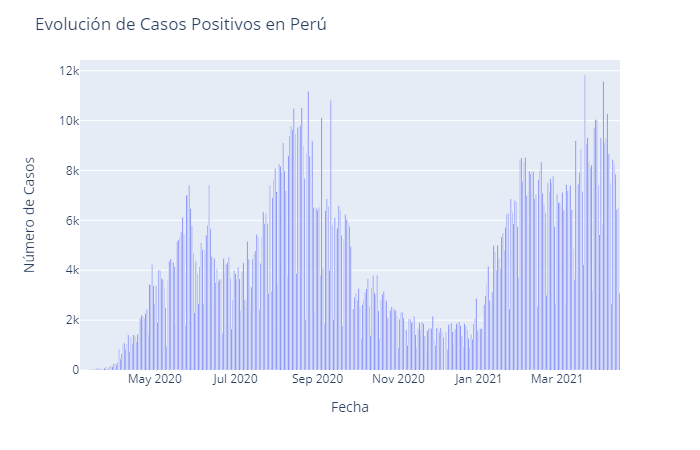

In [102]:
figura=px.bar(x=positivos['FECHA_RESULTADO'],y=positivos['Casos']) 
figura.update_layout(title="Evolución de Casos Positivos en Perú", xaxis_title="Fecha",yaxis_title="Número de Casos")  
figura.show("png")
#figura.show() Si se desea ver el chart de forma dinámica

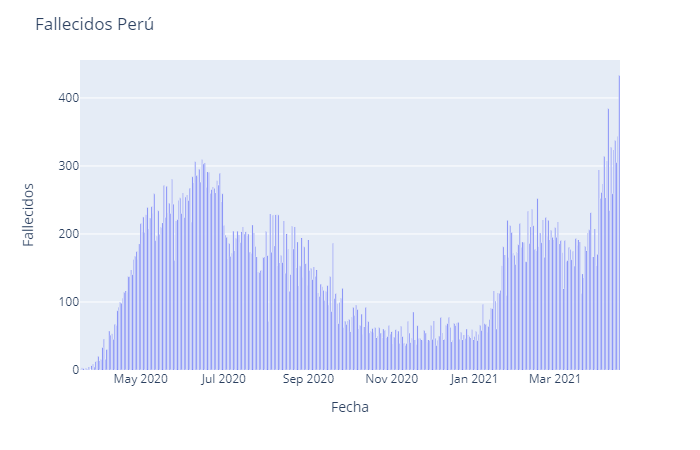

In [103]:
figura=px.bar(x=fallecidos['FECHA_FALLECIMIENTO'],y=fallecidos['Casos']) 
figura.update_layout(title="Fallecidos Perú", xaxis_title="Fecha",yaxis_title="Fallecidos")
figura.show('png')
#figura.show() Si se desea ver el chart de forma dinámica

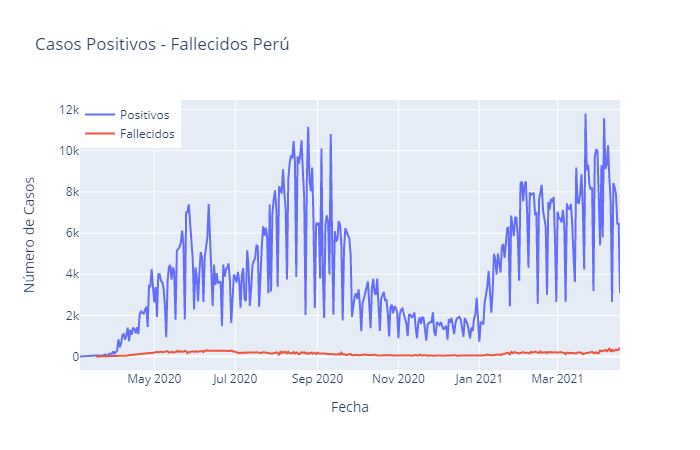

In [104]:
positivos_fallecidos=go.Figure()
positivos_fallecidos.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=positivos['Casos'], mode='lines', name='Positivos'))
positivos_fallecidos.add_trace(go.Scatter(x=fallecidos['FECHA_FALLECIMIENTO'], y=fallecidos['Casos'], mode='lines', name='Fallecidos'))
positivos_fallecidos.update_layout(title="Casos Positivos - Fallecidos Perú", xaxis_title="Fecha",yaxis_title="Número de Casos",legend=dict(x=0,y=1,traceorder="normal"))
positivos_fallecidos.show('png')
#figura.show() Si se desea ver el chart de forma dinámica

# 
<h1>Predicciones de casos confirmados diarios usando modelos de Machine Learning</h1>

### Regresión Lineal

In [105]:
#Empezamos a entrenar los datos
train_ml=positivos.iloc[:int(positivos.shape[0]*0.95)]
valid_ml=positivos.iloc[int(positivos.shape[0]*0.95):]
model_scores=[] 

In [106]:
regresion_lineal=LinearRegression(normalize=True)

In [107]:
regresion_lineal.fit(np.array(train_ml['Dia']).reshape(-1,1),np.array(train_ml["Casos"]).reshape(-1,1))

LinearRegression(normalize=True)

In [108]:
prediccion_valida=regresion_lineal.predict(np.array(valid_ml["Dia"]).reshape(-1,1))

In [109]:
#Con el error cuadrático medio
#Este cuantifica cuán diferente es un conjunto de valores. 
#Cuanto más pequeño es un valor ECM, más cercanos son los valores predichos y observados.

model_scores.append(np.sqrt(mean_squared_error(valid_ml['Casos'],prediccion_valida)))
print("Error cuadrático medio de la raíz para regresión lineal: ",np.sqrt(mean_squared_error(valid_ml['Casos'],prediccion_valida)))

Error cuadrático medio de la raíz para regresión lineal:  3078.9122081918554


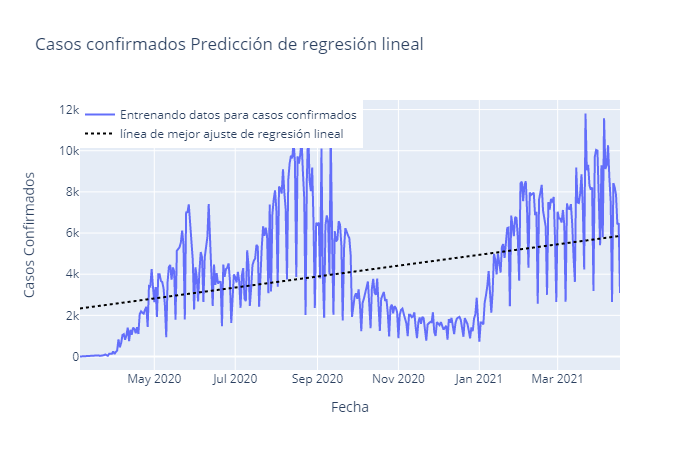

<Figure size 792x432 with 0 Axes>

In [110]:
#Mostrando la gráfica
plt.figure(figsize=(11,6))
prediction_linreg=regresion_lineal.predict(np.array(positivos['Dia']).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=positivos['Casos'],
                    mode='lines',name="Entrenando datos para casos confirmados"))
fig.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=linreg_output,
                    mode='lines',name="línea de mejor ajuste de regresión lineal",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title='Casos confirmados Predicción de regresión lineal',
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')

### Regresión Polinomial

In [111]:
train_ml=positivos.iloc[:int(positivos.shape[0]*0.95)]
valid_ml=positivos.iloc[int(positivos.shape[0]*0.95):]

In [112]:
poly = PolynomialFeatures(degree = 8) 

In [113]:
#Entrenando la data
train_poly=poly.fit_transform(np.array(train_ml["Dia"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Dia"]).reshape(-1,1))
y=train_ml['Casos']

In [114]:
regresion_l=LinearRegression(normalize=True)
regresion_l.fit(train_poly,y)

LinearRegression(normalize=True)

In [115]:
prediction_poly=regresion_l.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Casos"],prediction_poly))
model_scores.append(rmse_poly)
print("Error cuadrático medio de la raíz para regresión Polinomial:  ",rmse_poly)

Error cuadrático medio de la raíz para regresión Polinomial:   13201.589444835388


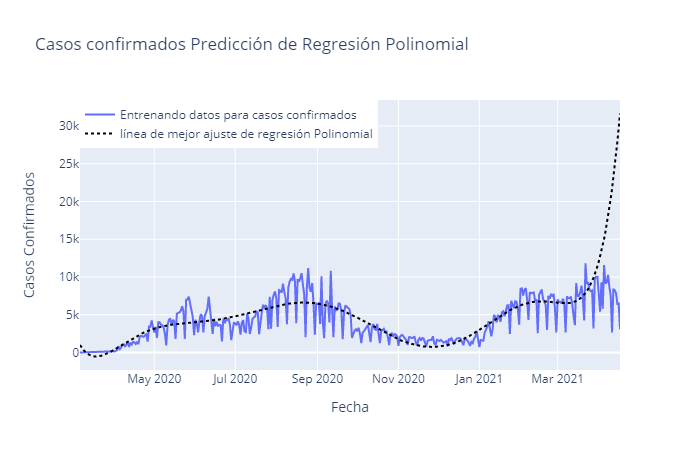

<Figure size 792x432 with 0 Axes>

In [116]:
comp_data=poly.fit_transform(np.array(positivos["Dia"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=regresion_l.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=positivos["Casos"],
                    mode='lines',name="Entrenando datos para casos confirmados"))
fig.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=predictions_poly,
                    mode='lines',name="línea de mejor ajuste de regresión Polinomial",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Casos confirmados Predicción de Regresión Polinomial",
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')

### Modelo SVM

In [117]:
train_ml=positivos.iloc[:int(positivos.shape[0]*0.95)]
valid_ml=positivos.iloc[int(positivos.shape[0]*0.95):] 

In [118]:
#NICIALIZANDO EL MODELO SVM
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [119]:
svm.fit(np.array(train_ml["Dia"]).reshape(-1,1),np.array(train_ml["Casos"]).reshape(-1,1))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [120]:
prediccion_valida_SVM=svm.predict(np.array(valid_ml['Dia']).reshape(-1,1))

In [121]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Casos"],prediccion_valida_SVM)))
print("Error cuadrático medio de la raíz para el modelo SVM: ",np.sqrt(mean_squared_error(valid_ml["Casos"],prediccion_valida_SVM)))

Error cuadrático medio de la raíz para el modelo SVM:  3326.1046696590683


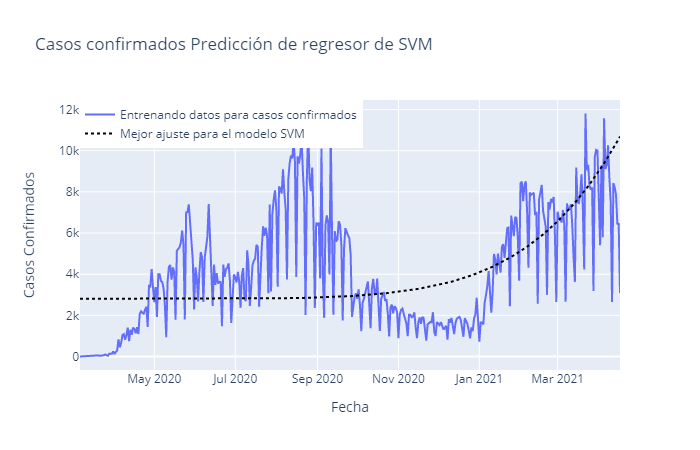

<Figure size 792x432 with 0 Axes>

In [122]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(positivos['Dia']).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=positivos['Casos'],
                    mode='lines',name="Entrenando datos para casos confirmados"))
fig.add_trace(go.Scatter(x=positivos['FECHA_RESULTADO'], y=prediction_svm,
                    mode='lines',name="Mejor ajuste para el modelo SVM",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Casos confirmados Predicción de regresor de SVM",
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')
#figura.show() Si se desea ver el chart de forma dinámica

## 
## Pronostico de series de tiempo

### Modelo Lineal de Holt

In [123]:
model_train=positivos.iloc[:int(positivos.shape[0]*0.95)]
valid=positivos.iloc[int(positivos.shape[0]*0.95):]
y_pred=valid.copy() 

In [124]:
holt=Holt(np.asarray(model_train["Casos"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

<ipython-input-124-dbc0dbf282d1>:1: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



In [125]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred['Casos'],y_pred["Holt"])))
print("Raíz del error cuadrático medio del Modelo lineal de Holt: ",np.sqrt(mean_squared_error(y_pred['Casos'],y_pred["Holt"])))

Raíz del error cuadrático medio del Modelo lineal de Holt:  2384.970572664481


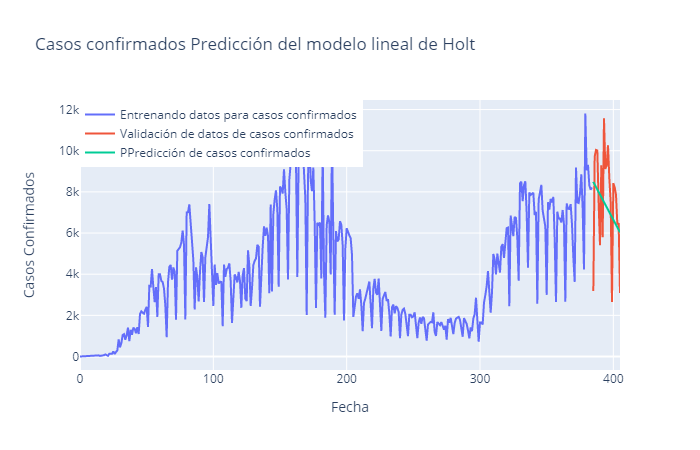

In [126]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train['Casos'],
                    mode='lines',name="Entrenando datos para casos confirmados"))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Casos'],
                    mode='lines',name="Validación de datos de casos confirmados",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines',name="PPredicción de casos confirmados",))
fig.update_layout(title="Casos confirmados Predicción del modelo lineal de Holt",
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')

### Modelo de AR Auto ARIMA

In [127]:
model_train=positivos.iloc[:int(positivos.shape[0]*0.95)]
valid=positivos.iloc[int(positivos.shape[0]*0.95):]
y_pred=valid.copy()

In [128]:
model_ar= auto_arima(model_train["Casos"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Casos"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6835.061, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6779.963, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6731.411, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6715.130, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6712.652, Time=0.06 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 0.185 seconds


ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [129]:
prediction_ar=model_ar.predict(len(valid))
y_pred["Modelo de predicción AR"]=prediction_ar

In [130]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Casos"],y_pred["Modelo de predicción AR"])))
print("Raíz del error cuadrático medio del Modelo AR: ",np.sqrt(mean_squared_error(y_pred["Casos"],y_pred["Modelo de predicción AR"])))

Raíz del error cuadrático medio del Modelo AR:  2681.295243148002


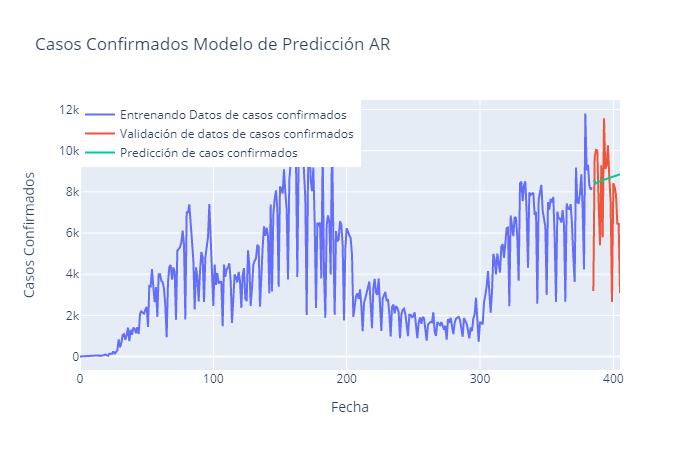

In [131]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Casos"],
                    mode='lines',name="Entrenando Datos de casos confirmados"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Casos"],
                    mode='lines',name="Validación de datos de casos confirmados",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Modelo de predicción AR"],
                    mode='lines',name="Predicción de caos confirmados",))
fig.update_layout(title="Casos Confirmados Modelo de Predicción AR",
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')

### Evaluando la precisión de cada modelo en base a su error cuadrático medio

Evaluamos el rendimiento de cada modelo empleado, en base a ello se elige al mejor algoritmo para posteriormente emplearlo en los estudiantes universitarios.

Se denota que el modelo Holt es el algoritmo más ideal para pronosticar los casos positivos de COVID-19 en el Perú

In [132]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Auto Regressive Model (AR)"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
3,Holt's Linear,2384.970573
4,Auto Regressive Model (AR),2681.295243
0,Linear Regression,3078.912208
2,Support Vector Machine Regressor,3326.104670
1,Polynomial Regression,13201.589445


# Predicciones casos positivos COVID-19 en ESTUDIANTES UNIVERSITARIOS PERÚ

Asumiendo que los estudiantes universitarios se encuentran en la edad de 18 a 27 años se plantea los siguientes dataframes de casos de infección y fallecimiento por COVID-19 en estudiantes universitarios.

In [133]:
U_positivos = positivosPeru[(positivosPeru['EDAD']> 17) & (positivosPeru['EDAD']<28)] 
U_positivos.head()

,FECHA_RESULTADO,DEPARTAMENTO,METODODX,EDAD,SEXO
10,2020-03-30,LIMA REGION,PR,24,FEMENINO
32,2020-04-01,CALLAO,PR,20,MASCULINO
39,2020-04-01,LIMA REGION,PR,18,MASCULINO
50,2020-04-01,LIMA,PR,25,MASCULINO
56,2020-04-02,LIMA,PR,21,MASCULINO


In [134]:
print('Cantidad de Estudiantes Universitarios Infectados: ',U_positivos.shape[0])

Cantidad de Estudiantes Universitarios Infectados:  260531


In [135]:
U_fallecidos = fallecidosPeru[(fallecidosPeru['EDAD_DECLARADA']> 17) & (fallecidosPeru['EDAD_DECLARADA']<28)] 
U_fallecidos.head()

,FECHA_FALLECIMIENTO,DEPARTAMENTO,SEXO,EDAD_DECLARADA
14,2020-07-06,LA LIBERTAD,MASCULINO,20
252,2020-06-01,LAMBAYEQUE,MASCULINO,25
411,2020-08-19,AREQUIPA,MASCULINO,18
457,2020-06-11,LORETO,MASCULINO,26
464,2020-06-12,LORETO,FEMENINO,26


In [136]:
print('Cantidad de Estudiantes Universitarios fallecidos: ',U_fallecidos.shape[0])

Cantidad de Estudiantes Universitarios fallecidos:  474


### Preparando la data para el análisis

In [137]:
universitarios_positivos = pd.DataFrame(data= {'Casos':U_positivos.groupby('FECHA_RESULTADO').size()})
universitarios_positivos = universitarios_positivos.reset_index() #Evitamos que la FECHA_RESULTADO sea tomado como índice en el DataFrame
universitarios_positivos

,FECHA_RESULTADO,Casos
0,2020-03-06,1
1,2020-03-07,1
2,2020-03-08,1
3,2020-03-09,1
4,2020-03-11,2
...,...,...
399,2021-04-13,1365
400,2021-04-14,1331
401,2021-04-15,1106
402,2021-04-16,1077


In [138]:
#para los ejes X nos centraremos por días que transcurrieron desde que empezo la pandemia.
#consideramos el 6 de Marzo como día 1 hasta el 17 de abril del 2021 como día 406, siendo así evaluados 406 días de Pandemia
start = datetime.datetime(2020,3,6)
end = datetime.datetime(2021,4,17)

index = pd.date_range(start, end)
multiple = 1

lista_de_dias = list(range(1, len(index)-3, multiple)) 
lista_de_dias
universitarios_positivos['Dia'] = lista_de_dias
universitarios_positivos

,FECHA_RESULTADO,Casos,Dia
0,2020-03-06,1,1
1,2020-03-07,1,2
2,2020-03-08,1,3
3,2020-03-09,1,4
4,2020-03-11,2,5
...,...,...,...
399,2021-04-13,1365,400
400,2021-04-14,1331,401
401,2021-04-15,1106,402
402,2021-04-16,1077,403


In [139]:
universitarios_fallecidos = pd.DataFrame(data= {'Casos':U_fallecidos.groupby('FECHA_FALLECIMIENTO').size()})
universitarios_fallecidos = universitarios_fallecidos.reset_index() #Evitamos que la FECHA_RESULTADO sea tomado como índice en el DataFrame
universitarios_fallecidos

,FECHA_FALLECIMIENTO,Casos
0,2020-03-28,1
1,2020-03-29,1
2,2020-03-30,1
3,2020-04-08,1
4,2020-04-14,1
...,...,...
263,2021-04-13,4
264,2021-04-14,1
265,2021-04-15,2
266,2021-04-16,7


In [140]:
#para los ejes X nos centraremos por días que transcurrieron desde que empezo la pandemia.
#consideramos el 6 de Marzo como día 1 hasta el 17 de abril del 2021 como día 406, siendo así evaluados 406 días de Pandemia

lista_de_dias = list(range(1, 269)) 
lista_de_dias
universitarios_fallecidos['Dia'] = lista_de_dias
universitarios_fallecidos 

,FECHA_FALLECIMIENTO,Casos,Dia
0,2020-03-28,1,1
1,2020-03-29,1,2
2,2020-03-30,1,3
3,2020-04-08,1,4
4,2020-04-14,1,5
...,...,...,...
263,2021-04-13,4,264
264,2021-04-14,1,265
265,2021-04-15,2,266
266,2021-04-16,7,267


# 
# Vizualizaciones positivos-fallecidos Estudiantes Universitarios

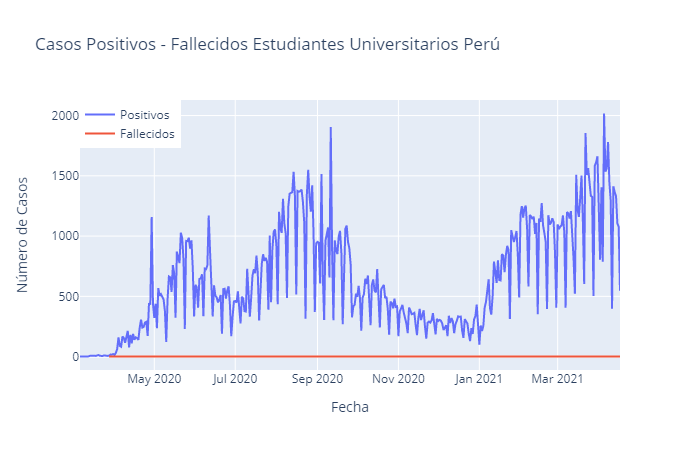

In [141]:
positivos_fallecidos_u=go.Figure()
positivos_fallecidos_u.add_trace(go.Scatter(x=universitarios_positivos['FECHA_RESULTADO'], y=universitarios_positivos['Casos'], mode='lines', name='Positivos'))
positivos_fallecidos_u.add_trace(go.Scatter(x=universitarios_fallecidos['FECHA_FALLECIMIENTO'], y=universitarios_fallecidos['Casos'], mode='lines', name='Fallecidos'))
positivos_fallecidos_u.update_layout(title="Casos Positivos - Fallecidos Estudiantes Universitarios Perú", xaxis_title="Fecha",yaxis_title="Número de Casos",legend=dict(x=0,y=1,traceorder="normal"))
positivos_fallecidos_u.show('png')


### Pronóstico de casos positivos COVID-19 en estudiantes universitarios (Modelo Holt)

In [142]:
model_train=universitarios_positivos.iloc[:int(universitarios_positivos.shape[0]*0.95)]
valid=universitarios_positivos.iloc[int(universitarios_positivos.shape[0]*0.95):]
y_pred=valid.copy() 

In [143]:
holt=Holt(np.asarray(model_train["Casos"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

<ipython-input-143-dbc0dbf282d1>:1: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



In [144]:
y_pred["Holt"]=holt.forecast(len(valid))

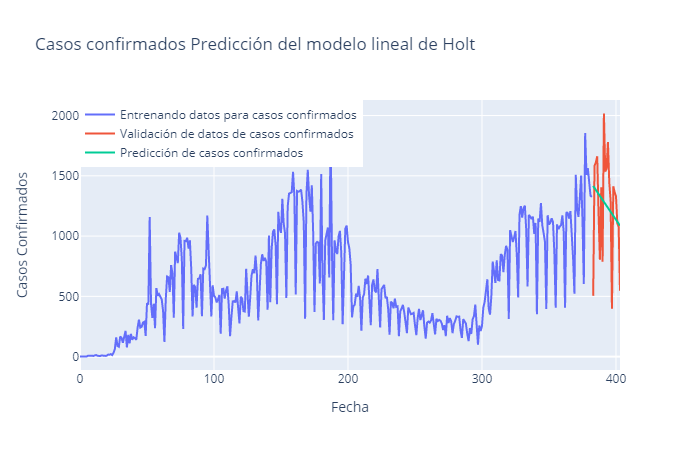

In [145]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train['Casos'],
                    mode='lines',name="Entrenando datos para casos confirmados"))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Casos'],
                    mode='lines',name="Validación de datos de casos confirmados",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines',name="Predicción de casos confirmados",))
fig.update_layout(title="Casos confirmados Predicción del modelo lineal de Holt",
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')

### Pronóstico de fallecidos COVID-19 en estudiantes universitarios (Modelo Holt)

In [146]:
model_train=universitarios_fallecidos.iloc[:int(universitarios_fallecidos.shape[0]*0.95)]
valid=universitarios_fallecidos.iloc[int(universitarios_fallecidos.shape[0]*0.95):]
y_pred=valid.copy() 

In [147]:
holt=Holt(np.asarray(model_train["Casos"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False) 

<ipython-input-147-dbc0dbf282d1>:1: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



In [148]:
y_pred["Holt"]=holt.forecast(len(valid))

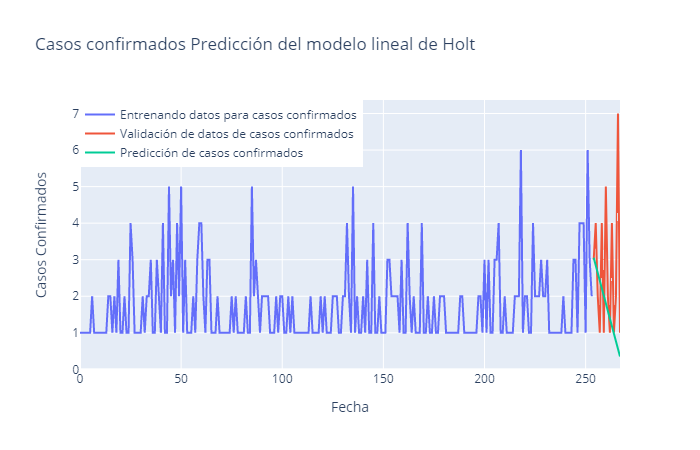

In [149]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train['Casos'],
                    mode='lines',name="Entrenando datos para casos confirmados"))
fig.add_trace(go.Scatter(x=valid.index, y=valid['Casos'],
                    mode='lines',name="Validación de datos de casos confirmados",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines',name="Predicción de casos confirmados",))
fig.update_layout(title="Casos confirmados Predicción del modelo lineal de Holt",
                 xaxis_title="Fecha",yaxis_title="Casos Confirmados",legend=dict(x=0,y=1,traceorder="normal"))
fig.show('png')